In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
path1 = './data/edustats.csv'
path2 = './data/edustats_indicators.csv'
path3 = './data/imo.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

df4 = pd.merge(df1, df2, on = 'Indicator.Code', how = 'outer')
df = pd.merge(df3, df4, on = 'Country.Name', how = 'outer')
df.dropna(how = 'any', inplace = True)
df.drop(['Indicator.Name'], axis = 1, inplace = True)

In [3]:
df.head()

,Country.Name,Mean.Rank,Indicator.Code,value
0,Albania,79.83,UIS.NERA.2,86.577433
1,Albania,79.83,UIS.NERA.2.F,86.026518
2,Albania,79.83,UIS.NERA.2.GPI,0.987608
3,Albania,79.83,UIS.NERA.2.M,87.103674
4,Albania,79.83,SE.PRM.TENR,93.175414


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185402 entries, 0 to 365619
Data columns (total 4 columns):
Country.Name      185402 non-null object
Mean.Rank         185402 non-null float64
Indicator.Code    185402 non-null object
value             185402 non-null float64
dtypes: float64(2), object(2)
memory usage: 7.1+ MB


In [5]:
df['Mean.Rank'].describe()

count    185402.000000
mean         53.879284
std          29.843445
min           1.630000
25%          26.750000
50%          51.750000
75%          79.290000
max         110.000000
Name: Mean.Rank, dtype: float64

In [6]:
df_temp = df.pivot_table(index='Country.Name', columns='Indicator.Code', values='value').dropna(axis = 1, how = 'any')
df_temp.head()

Indicator.Code,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.GROW,SP.POP.TOTL
Country.Name,,,,,,
Albania,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06
Algeria,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07
Argentina,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07
Armenia,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06
Australia,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07


In [7]:
combine1 = pd.merge(df_temp, df3, left_index=True, right_on='Country.Name', how='inner')
combine1.head()

,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.GROW,SP.POP.TOTL,Country.Name,Mean.Rank
0,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06,Albania,79.83
1,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07,Algeria,72.33
2,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07,Argentina,50.00
3,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06,Armenia,43.88
4,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07,Australia,19.75


In [8]:
combine1 = combine1[['Country.Name','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD',
                   'NY.GNP.MKTP.CD','NY.GNP.PCAP.CD','SP.POP.GROW','SP.POP.TOTL','Mean.Rank']]
combine1.head()

,Country.Name,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,NY.GNP.MKTP.CD,NY.GNP.PCAP.CD,SP.POP.GROW,SP.POP.TOTL,Mean.Rank
0,Albania,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06,79.83
1,Algeria,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07,72.33
2,Argentina,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07,50.00
3,Armenia,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06,43.88
4,Australia,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07,19.75


In [9]:
combine1= combine1.rename(index=str, columns={"Country.Name": "CName", 
                                               "NY.GDP.MKTP.CD": "GDPMKTP",
                                               "NY.GDP.PCAP.CD": "GDPPCAP",
                                               "NY.GNP.MKTP.CD": "GnpMKTP",
                                               "NY.GNP.PCAP.CD": "GnpPCAP",
                                              "SP.POP.GROW":"POPGrow",
                                              "SP.POP.TOTL":"POPTotal"})
combine1.head()

,CName,GDPMKTP,GDPPCAP,GnpMKTP,GnpPCAP,POPGrow,POPTotal,Mean.Rank
0,Albania,9.410937e+09,3189.768220,9.470301e+09,3157.333333,-0.478064,2.974934e+06,79.83
1,Algeria,1.317592e+11,3715.771082,1.291736e+11,3485.333333,1.569656,3.458545e+07,72.33
2,Argentina,3.302893e+11,8129.612822,3.211426e+11,7636.000000,1.062501,3.998689e+07,50.00
3,Armenia,7.091924e+09,2371.092082,7.411904e+09,2384.666667,-0.191634,3.006685e+06,43.88
4,Australia,9.086037e+11,41988.418643,8.780958e+11,38833.333333,1.432896,2.111886e+07,19.75


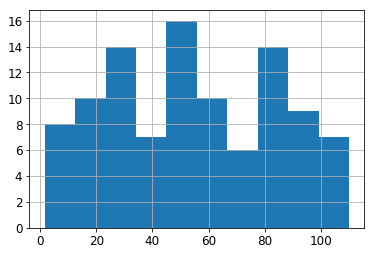

In [10]:
combine1['Mean.Rank'].hist()

In [11]:
combine1.describe()

,GDPMKTP,GDPPCAP,GnpMKTP,GnpPCAP,POPGrow,POPTotal,Mean.Rank
count,1.010000e+02,101.000000,1.010000e+02,101.000000,101.000000,1.010000e+02,101.000000
mean,5.253302e+11,15722.414863,5.257771e+11,14743.444988,0.898732,5.889643e+07,54.648416
std,1.561320e+12,20611.690676,1.581357e+12,18554.875495,0.947926,1.776479e+08,30.013872
min,3.087337e+09,440.885561,3.140551e+09,422.666667,-1.225695,3.539187e+04,1.630000
25%,2.289899e+10,2376.904759,2.234440e+10,2272.000000,0.189381,4.676518e+06,27.750000
50%,1.110890e+11,6312.645720,1.065114e+11,5586.666667,1.013378,1.126882e+07,52.380000
75%,3.302893e+11,23119.635934,3.269764e+11,21840.000000,1.495713,4.442321e+07,80.130000
max,1.379220e+13,113818.255193,1.398027e+13,90211.000000,3.301460,1.316139e+09,110.000000


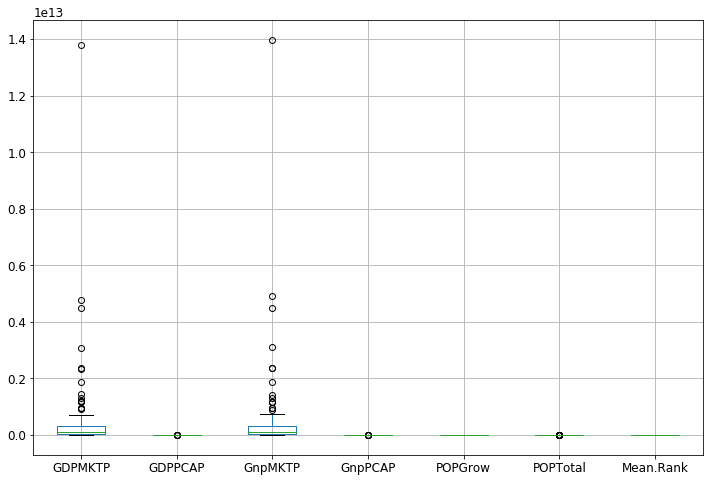

In [12]:
combine1.boxplot(figsize=(12,8))

In [13]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor    

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
vif["features"] = df_temp.columns
vif.round(1)

,VIF Factor,features
0,12932.1,NY.GDP.MKTP.CD
1,81.9,NY.GDP.PCAP.CD
2,12854.9,NY.GNP.MKTP.CD
3,84.4,NY.GNP.PCAP.CD
4,1.3,SP.POP.GROW
5,1.7,SP.POP.TOTL


In [ ]:
# low = .005
# high = .995
# quant_df = combine1.quantile([low, high])
# quant_df

In [ ]:
# from scipy import stats
# df_temp2=df_temp[(np.abs(stats.zscore(df_temp)) < 3).all(axis=1)]
# combine2 = pd.merge(df_temp2, df3, left_index=True, right_on='Country.Name', how='inner')
# combine2 = combine2[['Country.Name','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD',
#                    'NY.GNP.MKTP.CD','NY.GNP.PCAP.CD','SP.POP.GROW','SP.POP.TOTL','Mean.Rank']]
# combine2= combine2.rename(index=str, columns={"Country.Name": "CName", 
#                                                "NY.GDP.MKTP.CD": "GDPMKTP",
#                                                "NY.GDP.PCAP.CD": "GDPPCAP",
#                                                "NY.GNP.MKTP.CD": "GnpMKTP",
#                                                "NY.GNP.PCAP.CD": "GnpPCAP",
#                                               "SP.POP.GROW":"POPGrow",
#                                               "SP.POP.TOTL":"POPTotal"})
# combine2

In [15]:
# import seaborn as sns
# g = sns.pairplot(combine1, diag_kind="kde", markers="+",
# ...                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
# ...                  diag_kws=dict(shade=True))
# # from pandas.tools.plotting import scatter_matrix
# scatter_matrix(combine2, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [16]:
import seaborn as sns
combine1_copy = combine1.drop(["CName", "Mean.Rank"], axis=1)
train_int_name = combine1_copy.select_dtypes(include=['int64','float64']).columns.values
corr = combine1[train_int_name].corr()

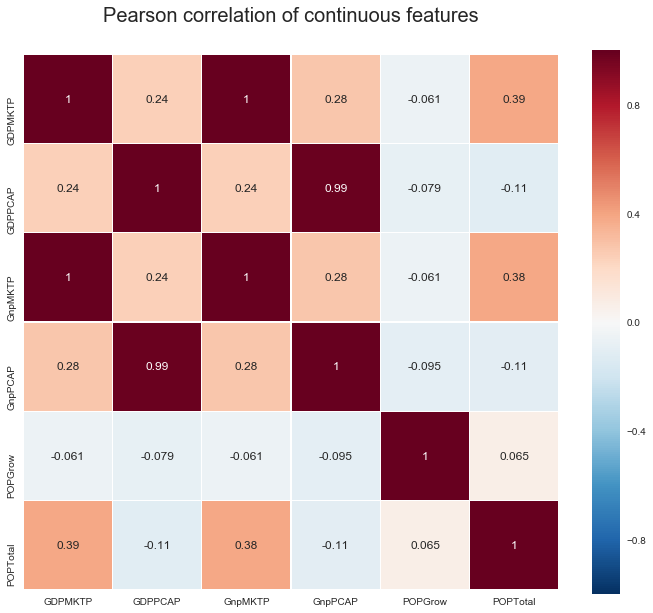

In [17]:
colormap = plt.cm.inferno
plt.figure(figsize=(12,10))
# ax.xaxis.set_label_position('top') 
plt.title('Pearson correlation of continuous features', y=1.05, size=20)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

X = combine1.drop(['CName', 'Mean.Rank'], axis = 1).values
y = combine1['Mean.Rank'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# def rmsle_cv(model):
#     model.fit(X_train,y_train)
#     ypred = model.predict(X_test)
#     rmse = mean_squared_error(ypred, y_test)
#     return(rmse)

# linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# ridgereg = Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=None, solver='auto', tol=0.001)
# lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, max_iter = 10000000, random_state=1))
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, max_iter = 10000000, l1_ratio=.9, random_state=3))
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1, nthread = -1)
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
# score = rmsle_cv(linreg)
# print("\nreg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(ridgereg)
# print("\nridgereg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(lasso)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(ENet)
# print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# score = rmsle_cv(model_lgb)
# print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [19]:
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
ridgereg = Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, max_iter = 10000000, random_state=2))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, max_iter = 10000000, l1_ratio=.9, random_state=3))
RF = RandomForestRegressor(min_samples_split = 30, 
                             max_leaf_nodes = 15, 
                             n_estimators = 30, 
                             max_depth = 5,
                             min_samples_leaf = 3)
GBoost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =4)
XGBoost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
LGBoost = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

clfs = {'linreg': linreg, 
        'ridgereg': ridgereg, 
        'lasso': lasso, 
        'ENet': ENet,
        'RF': RF,
        'GBoost': GBoost,
        'XGBoost': XGBoost,
        'LGBoost': LGBoost}

res1 = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    res1.append([name, mean_squared_error(ypred, y_test)])
    
res1_score = pd.DataFrame(np.array(res1).reshape(8,2), columns = ['clf', 'clf_mse'])
res1_score['clf_mse'] = res1_score['clf_mse'].astype(float)
res1_score.sort_values('clf_mse')

,clf,clf_mse
6,XGBoost,412.426320
7,LGBoost,498.219847
5,GBoost,515.462419
4,RF,598.139068
1,ridgereg,3650.646740
0,linreg,3675.779532
2,lasso,3677.306699
3,ENet,3690.813394


# Use more features and set the thresh 50 for 101 countries

In [20]:
na_thresh = np.arange(0, 100, 10)

def mse_thresh(thresh):
    df_temp = df.pivot_table(index='Country.Name', 
                              columns='Indicator.Code', 
                              values='value'
                             ).dropna(axis = 1, thresh = thresh)
    combine = pd.merge(df_temp, df3, left_index=True, right_on='Country.Name', how='inner')
    X = combine.drop(['Country.Name', 'Mean.Rank'], axis = 1).values
    y = combine['Mean.Rank'].values
    
    print('the threshold of NA: {0: 4d}, the number of columns: {1: 4d}'.format(thresh, X.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    res = []
    clfs = {
            'XGBoost': XGBoost,
            'LGBoost': LGBoost}

    for name, clf in clfs.items():
        clf.fit(X_train,y_train)
        ypred = clf.predict(X_test)
        res.append([name, mean_squared_error(ypred, y_test)])

    res_score = pd.DataFrame(np.array(res).reshape(2,2), columns = ['clf', 'clf_mse'])
    res_score['clf_mse'] = res_score['clf_mse'].astype(float)
    print(res_score.sort_values(['clf_mse'], ascending = True))

for thresh in na_thresh:
    mse_thresh(thresh)

the threshold of NA:    0, the number of columns:  3171
       clf     clf_mse
1  LGBoost  382.117789
0  XGBoost  462.570615
the threshold of NA:   10, the number of columns:  2738
       clf     clf_mse
1  LGBoost  432.642627
0  XGBoost  507.387883
the threshold of NA:   20, the number of columns:  2432
       clf     clf_mse
1  LGBoost  406.563465
0  XGBoost  424.884122
the threshold of NA:   30, the number of columns:  2205
       clf     clf_mse
1  LGBoost  407.057064
0  XGBoost  500.219441
the threshold of NA:   40, the number of columns:  2003
       clf     clf_mse
0  XGBoost  415.847061
1  LGBoost  436.854535
the threshold of NA:   50, the number of columns:  1822
       clf     clf_mse
1  LGBoost  413.994170
0  XGBoost  515.914811
the threshold of NA:   60, the number of columns:  1774
       clf     clf_mse
0  XGBoost  441.507370
1  LGBoost  456.514154
the threshold of NA:   70, the number of columns:  1625
       clf     clf_mse
1  LGBoost  389.105272
0  XGBoost  399.480733
